In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import sys
import collections, numpy
from sklearn import datasets
import matplotlib.pyplot as plt
import csv
import scipy
import seaborn as sns
import sklearn
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, chi2 , SelectPercentile , f_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.pipeline import make_pipeline

In [2]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
df = pd.read_csv("fake_job_with_function.csv",index_col=None)
df

,Unnamed: 0,has_company_logo,has_questions,telecommuting,fraudulent,Salaire_encode,Employment_encode,Experience_encode,Education_encoded,industry_Aviation & automobile,...,function_Human Resources,function_Information Technology,function_Legal,function_Management,function_Other,function_Production,function_Quality Assurance,function_Sales,function_Supply Chain,function_Writing/Editing
0,0,1,1,0,0,1,5,4,5,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,5,5,6,2,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1,0,0,0,4,5,6,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1,1,0,1,4,5,4,2,0,...,0,0,0,0,1,0,0,0,0,0
4,4,1,0,1,0,1,5,3,2,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,769,1,0,1,1,2,5,3,2,0,...,0,0,0,0,0,0,0,1,0,0
736,770,1,0,1,1,2,5,3,2,0,...,0,0,0,0,0,0,0,1,0,0
737,771,1,0,1,1,2,5,3,2,0,...,0,0,0,0,0,0,0,1,0,0
738,772,1,0,0,0,4,5,4,2,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df=df.drop(['Unnamed: 0'],1)
df

,has_company_logo,has_questions,telecommuting,fraudulent,Salaire_encode,Employment_encode,Experience_encode,Education_encoded,industry_Aviation & automobile,industry_Civil Engineering,...,function_Human Resources,function_Information Technology,function_Legal,function_Management,function_Other,function_Production,function_Quality Assurance,function_Sales,function_Supply Chain,function_Writing/Editing
0,1,1,0,0,1,5,4,5,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,5,5,6,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,4,5,6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,4,5,4,2,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,1,5,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,1,1,2,5,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
736,1,0,1,1,2,5,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
737,1,0,1,1,2,5,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
738,1,0,0,0,4,5,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['has_company_logo', 'has_questions', 'telecommuting', 'fraudulent',
       'Salaire_encode', 'Employment_encode', 'Experience_encode',
       'Education_encoded', 'industry_Aviation & automobile',
       'industry_Civil Engineering', 'industry_Computer & Network',
       'industry_Design', 'industry_Economics/Management/Logistics',
       'industry_Human Resources', 'industry_Information Technology',
       'industry_Legal Services', 'industry_Leisure, Travel & Tourism',
       'industry_Oil & Energy', 'industry_Religious Institutions',
       'industry_Telecommunications', 'industry_health',
       'industry_technical area', 'Country_AU', 'Country_BR', 'Country_CA',
       'Country_DE', 'Country_EG', 'Country_FR', 'Country_GB', 'Country_GR',
       'Country_HK', 'Country_ID', 'Country_IN', 'Country_IQ', 'Country_IT',
       'Country_KH', 'Country_MU', 'Country_MY', 'Country_NL', 'Country_NZ',
       'Country_PH', 'Country_PK', 'Country_SA', 'Country_SG', 'Country_TH',
       'C

In [6]:
X=df.drop(['fraudulent'],1)
y=df['fraudulent']

In [7]:
anova = f_classif(X,y)
p_values_anova = pd.Series(anova[1], index = X.columns)
p_values_anova.sort_values(ascending = True , inplace= True)
p_values_anova

Country_US                                 4.590028e-17
function_Other                             4.126463e-15
industry_Oil & Energy                      4.355065e-11
Country_GB                                 4.116520e-06
industry_Economics/Management/Logistics    1.890786e-05
                                               ...     
Country_BR                                 7.448370e-01
Employment_encode                          8.663308e-01
industry_Telecommunications                8.819796e-01
has_questions                              9.334191e-01
function_Administrative                    9.911000e-01
Length: 68, dtype: float64

In [8]:
chi2_score = chi2(X,y)
p_value_chi2 = pd.Series(chi2_score[1], index = X.columns)
p_value_chi2.sort_values(ascending = True , inplace= True)
p_value_chi2

function_Other                     6.014345e-14
industry_Oil & Energy              2.955763e-10
Country_US                         1.402472e-08
Country_GB                         4.723296e-05
industry_Information Technology    1.536164e-04
                                       ...     
has_company_logo                   7.648353e-01
industry_Telecommunications        8.836205e-01
has_questions                      9.617520e-01
Employment_encode                  9.705888e-01
function_Administrative            9.912124e-01
Length: 68, dtype: float64

In [9]:
p_values_anova.index[0:21]

Index(['Country_US', 'function_Other', 'industry_Oil & Energy', 'Country_GB',
       'industry_Economics/Management/Logistics',
       'industry_Information Technology', 'function_Sales',
       'function_Information Technology', 'industry_Computer & Network',
       'Country_TW', 'function_Engineering', 'industry_health',
       'Education_encoded', 'function_Analyst', 'telecommuting', 'Country_NZ',
       'has_company_logo', 'Salaire_encode', 'Country_GR',
       'industry_technical area', 'Country_DE'],
      dtype='object')

In [10]:
p_value_chi2.index[0:15]

Index(['function_Other', 'industry_Oil & Energy', 'Country_US', 'Country_GB',
       'industry_Information Technology',
       'industry_Economics/Management/Logistics',
       'function_Information Technology', 'Country_TW', 'function_Sales',
       'industry_health', 'function_Engineering',
       'industry_Computer & Network', 'function_Analyst', 'telecommuting',
       'Country_NZ'],
      dtype='object')

In [11]:
p_value_chi2[p_value_chi2<0.05]

function_Other                             6.014345e-14
industry_Oil & Energy                      2.955763e-10
Country_US                                 1.402472e-08
Country_GB                                 4.723296e-05
industry_Information Technology            1.536164e-04
industry_Economics/Management/Logistics    3.305713e-04
function_Information Technology            6.709612e-04
Country_TW                                 2.143350e-03
function_Sales                             2.317410e-03
industry_health                            2.573834e-03
function_Engineering                       4.739878e-03
industry_Computer & Network                4.878392e-03
function_Analyst                           8.809421e-03
telecommuting                              1.478214e-02
Country_NZ                                 3.070007e-02
dtype: float64

In [12]:
p_values_anova[p_values_anova<0.05]

Country_US                                 4.590028e-17
function_Other                             4.126463e-15
industry_Oil & Energy                      4.355065e-11
Country_GB                                 4.116520e-06
industry_Economics/Management/Logistics    1.890786e-05
industry_Information Technology            2.620046e-05
function_Sales                             1.040057e-04
function_Information Technology            2.207175e-04
industry_Computer & Network                1.036190e-03
Country_TW                                 2.095571e-03
function_Engineering                       2.120748e-03
industry_health                            2.353544e-03
Education_encoded                          6.164654e-03
function_Analyst                           7.962571e-03
telecommuting                              1.025618e-02
Country_NZ                                 2.586879e-02
has_company_logo                           4.850960e-02
dtype: float64

In [13]:
Chi2_5per = SelectPercentile(chi2, percentile=5).fit_transform(X,y)
Chi2_5per.shape

(740, 4)

In [14]:
Chi2_10per = SelectPercentile(chi2, percentile=10).fit_transform(X,y)
Chi2_10per.shape

(740, 7)

In [15]:
Chi2_15per = SelectPercentile(chi2, percentile=15).fit_transform(X,y)
Chi2_15per.shape

(740, 11)

In [16]:
Chi2_20per = SelectPercentile( chi2, percentile=20).fit_transform(X,y)
Chi2_20per.shape

(740, 14)

In [17]:
Chi2_30per = SelectPercentile(chi2, percentile=30).fit_transform(X,y)
Chi2_30per.shape

(740, 21)

In [18]:
Chi2_40per = SelectPercentile(chi2, percentile=40).fit_transform(X,y)
Chi2_40per.shape

(740, 27)

In [19]:
Chi2_50per = SelectPercentile(chi2, percentile=50).fit_transform(X,y)
Chi2_50per.shape

(740, 34)

In [20]:
#Combiner
from imblearn.combine import SMOTEENN

#OverSampling
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

#UnderSamling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours

In [21]:
#over sampling
smot = SMOTE(random_state=0) 
#combiner
smoten = SMOTEENN(random_state=0)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
#under-sampling
near_miss=NearMiss()


In [22]:
from sklearn.tree import DecisionTreeClassifier
DT_clas = DecisionTreeClassifier(random_state=0)
from sklearn.neighbors import KNeighborsClassifier
KNN_clas= KNeighborsClassifier()
from sklearn.svm import SVC
SVM_clas = SVC(random_state=0,probability=True)
from sklearn.neural_network import MLPClassifier
MLP_clas = MLPClassifier(random_state=0)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
RFC_clas = RandomForestClassifier(random_state=0)
ABC_clas=AdaBoostClassifier(random_state=0)
from sklearn.linear_model import LogisticRegression
LOGREG_clas=LogisticRegression(random_state=0)

In [23]:
X_train_real, X_test, y_train_real, y_test = train_test_split(Chi2_30per,y,test_size=0.2,random_state=0,stratify=y)

In [24]:
Counter(y)

Counter({0: 669, 1: 71})

In [25]:
Counter(y_test)

Counter({0: 134, 1: 14})

In [26]:
Counter(y_train_real)

Counter({0: 535, 1: 57})

In [27]:
def evaluation_oversamplig(model):
    
    X_train_ov, y_train_ov = smot.fit_resample(X_train_real, y_train_real)
    model.fit(X_train_ov, y_train_ov)
    y_pred = model.predict(X_test)
    probs=model.predict_proba(X_test)
    probs_ov=probs[:,1]
    
    print(collections.Counter(y_train_ov))
    print("Model best parameters: ", model.best_params_)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    scores = {
        'Model Recall' : [model.best_score_],
        'Test Accuracy' : [model.best_estimator_.score(X_test,y_test)],
        'Precision': [precision_score(y_test, y_pred)],
        'Balanced accuracy score': [balanced_accuracy_score(y_test,y_pred)],
        'AUC-score ' : [roc_auc_score(y_test, probs_ov)],
        'F2_score' : [fbeta_score(y_test,y_pred, beta=2.0)],
        'Recall' : [recall_score(y_test, y_pred)]
    }
    
    return pd.DataFrame(scores)
    


In [28]:
def evaluation_undersamplig(model):
    
    X_train_un, y_train_un = near_miss.fit_resample(X_train_real, y_train_real)
    model.fit(X_train_un, y_train_un)
    y_pred = model.predict(X_test)
    probss=model.predict_proba(X_test)
    probs_un=probss[:,1]
    
    print(collections.Counter(y_train_un))
    print("Model best parameters: ", model.best_params_)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
        
    scores = {
        'Model Recall' : [model.best_score_],
        'Test Accuracy' : [model.best_estimator_.score(X_test,y_test)],
        'Precision': [precision_score(y_test, y_pred)],
        'Balanced accuracy score': [balanced_accuracy_score(y_test,y_pred)],
        'AUC-score ' : [roc_auc_score(y_test, probs_un)],
        'F2_score' : [fbeta_score(y_test,y_pred, beta=2.0)],
        'Recall' : [recall_score(y_test, y_pred)]
    }
    
    return pd.DataFrame(scores)

In [29]:
def evaluation_combiner(model):
    
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.9)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
   # pipeline= make_pipeline(over,under)
    X_train_com, y_train_com = pipeline.fit_resample(X_train_real, y_train_real)
    model.fit(X_train_com, y_train_com)
    y_pred = model.predict(X_test)
    probss=model.predict_proba(X_test)
    probs_un=probss[:,1]
    
    print(collections.Counter(y_train_com))
    print("Model best parameters: ", model.best_params_)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
        
    scores = {
        'Model Recall' : [model.best_score_],
        'Test Accuracy' : [model.best_estimator_.score(X_test,y_test)],
        'Precision': [precision_score(y_test, y_pred)],
        'Balanced accuracy score': [balanced_accuracy_score(y_test,y_pred)],
        'AUC-score ' : [roc_auc_score(y_test, probs_un)],
        'F2_score' : [fbeta_score(y_test,y_pred, beta=2.0)],
        'Recall' : [recall_score(y_test, y_pred)]
    }
    
    return pd.DataFrame(scores)

In [30]:
def evaluation_raw(model):
    
    model.fit(X_train_real, y_train_real)
    y_pred = model.predict(X_test)
    probs_raw=model.predict_proba(X_test)
    probs_un=probs_raw[:,1]
    
    print(collections.Counter(y_train_real))
    print("Model best parameters: ", model.best_params_)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
        
    scores = {
        'Model Recall' : [model.best_score_],
        'Test Accuracy' : [model.best_estimator_.score(X_test,y_test)],
        'Precision': [precision_score(y_test, y_pred)],
        'Balanced accuracy score': [balanced_accuracy_score(y_test,y_pred)],
        'AUC-score ' : [roc_auc_score(y_test, probs_un)],
        'F2_score' : [fbeta_score(y_test,y_pred, beta=2.0)],
        'Recall' : [recall_score(y_test, y_pred)]
    }
    
    return pd.DataFrame(scores)

In [31]:
def borda_count(df):
    score = df.copy()
    score['BC_test_score'] = [0]*5
    for i in df.columns:
        k = 1
        for j in score[i].sort_values(ascending = True).index:
            score[i][j] = k
            score['BC_test_score'][j] += k
            k += 1
    return score 

In [32]:
#Decidion_tree
DT_pipe= make_pipeline(PolynomialFeatures(2),DT_clas)
param_tree = { 'decisiontreeclassifier__criterion':['gini','entropy'],
              'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7,10,13,15],
              'decisiontreeclassifier__min_samples_leaf': [0.04, 0.06, 0.08,1,2,4,6,8,13],
              'decisiontreeclassifier__max_features': [0.2, 0.4,0.6, 0.8]
            }
grid_dtree = GridSearchCV(DT_pipe, param_tree, cv=4, scoring='recall')
#Logistic_regression
LOG_pipe= make_pipeline(PolynomialFeatures(2),LOGREG_clas)
grid_log_param= {
                'logisticregression__penalty' : [ 'l2'],
                'logisticregression__C' : np.logspace(-4, 4, 20),
                'logisticregression__solver' : ['liblinear','sag']
                }
grid_log=GridSearchCV(LOG_pipe, grid_log_param, cv=4, scoring='recall')
#KNN
KNN_pipe= make_pipeline(StandardScaler(),KNN_clas)
grid_knn_param = {
             'kneighborsclassifier__n_neighbors':np.arange(2,15),
            'kneighborsclassifier__weights': ['uniform', 'distance'],
             'kneighborsclassifier__metric':['hamming']}
grid_knn = GridSearchCV(KNN_pipe, grid_knn_param, cv=4, scoring='recall')
#SVM
SVM_pipe= make_pipeline(StandardScaler(),SVM_clas)
grid_svm_param = {
               'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svc__gamma': [0.00001,0.0001,0.001, 0.01, 0.1, 1,10],
                'svc__kernel' : ["sigmoid","rbf"]
                }
grid_svm = GridSearchCV(SVM_pipe,grid_svm_param, cv=4, scoring='recall')
#MLP
MLP_pipe= make_pipeline(StandardScaler(),MLP_clas)
grid_mlp_param=  {'mlpclassifier__hidden_layer_sizes': [(3,), (6,), (9,)],
                 'mlpclassifier__activation': ['relu'],
                   'mlpclassifier__max_iter':[(200),(500)],
                  'mlpclassifier__solver': ['sgd', 'adam'],
                  'mlpclassifier__warm_start': [False],
                   'mlpclassifier__learning_rate_init':[ 0.01, 0.03, 0.1,0.3],
                   'mlpclassifier__alpha': [1e-7,1e-6,1e-5,1e-4,1e-3]}

grid_mlp=GridSearchCV(MLP_pipe, grid_mlp_param , cv=5, scoring='recall')


In [33]:
dict_of_models={'Decision_tree model':grid_dtree,'KNN model':grid_knn,
                'Logistic_regression model':grid_log, 'SVM model':grid_svm, 'MLP':grid_mlp
                }

In [34]:
resultats= pd.DataFrame()
models_names=['Decision_tree model','KNN model',
                'Logistic_regression model','SVM model','MLP']
                

for name , model in dict_of_models.items() :
    
    print('*****' +name+'*****')
    resultats = pd.concat([resultats,evaluation_oversamplig(model)])
    
resultats['model_names'] = models_names
resultats = resultats.set_index('model_names')
resultats

*****Decision_tree model*****
Counter({0: 535, 1: 535})
Model best parameters:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': 0.4, 'decisiontreeclassifier__min_samples_leaf': 2}
[[110  24]
 [  2  12]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       134
           1       0.33      0.86      0.48        14

    accuracy                           0.82       148
   macro avg       0.66      0.84      0.69       148
weighted avg       0.92      0.82      0.86       148

*****KNN model*****
Counter({0: 535, 1: 535})
Model best parameters:  {'kneighborsclassifier__metric': 'hamming', 'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'distance'}
[[126   8]
 [  8   6]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       134
           1       0.43      0.43      0.43        14

  

,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall
model_names,,,,,,,
Decision_tree model,0.975690,0.824324,0.333333,0.839019,0.870469,0.652174,0.857143
KNN model,0.708296,0.891892,0.428571,0.684435,0.903518,0.428571,0.428571
Logistic_regression model,0.981287,0.527027,0.166667,0.738806,0.925107,0.500000,1.000000
SVM model,0.979422,0.668919,0.222222,0.817164,0.930437,0.588235,1.000000
MLP,0.975701,0.878378,0.428571,0.868870,0.922974,0.714286,0.857143


In [35]:
resultats.to_csv('resultats_oversimpling30.csv')

In [36]:
borda_count(resultats)

C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall,BC_test_score
model_names,,,,,,,,
Decision_tree model,2.0,3.0,3.0,4.0,1.0,4.0,2.0,19
KNN model,1.0,5.0,4.0,1.0,2.0,1.0,1.0,15
Logistic_regression model,5.0,1.0,1.0,2.0,4.0,2.0,4.0,19
SVM model,4.0,2.0,2.0,3.0,5.0,3.0,5.0,24
MLP,3.0,4.0,5.0,5.0,3.0,5.0,3.0,28


In [37]:
resultats= pd.DataFrame()
models_names=['Decision_tree model','KNN model',
                'Logistic_regression model','SVM model','MLP']
                

for name , model in dict_of_models.items() :
    
    print('*****' +name+'*****')
    resultats = pd.concat([resultats,evaluation_undersamplig(model)])
    
resultats['model_names'] = models_names
resultats = resultats.set_index('model_names')
resultats

*****Decision_tree model*****
Counter({0: 57, 1: 57})
Model best parameters:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_features': 0.4, 'decisiontreeclassifier__min_samples_leaf': 1}
[[105  29]
 [ 12   2]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       134
           1       0.06      0.14      0.09        14

    accuracy                           0.72       148
   macro avg       0.48      0.46      0.46       148
weighted avg       0.82      0.72      0.77       148

*****KNN model*****
Counter({0: 57, 1: 57})
Model best parameters:  {'kneighborsclassifier__metric': 'hamming', 'kneighborsclassifier__n_neighbors': 13, 'kneighborsclassifier__weights': 'distance'}
[[93 41]
 [ 8  6]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       134
           1       0.13      0.43      0.20        14

    accura

,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall
model_names,,,,,,,
Decision_tree model,0.807143,0.722973,0.064516,0.463220,0.490405,0.114943,0.142857
KNN model,0.578571,0.668919,0.127660,0.561301,0.415245,0.291262,0.428571
Logistic_regression model,0.735714,0.472973,0.144444,0.676972,0.553571,0.445205,0.928571
SVM model,0.735714,0.195946,0.099237,0.523987,0.853678,0.347594,0.928571
MLP,0.827273,0.378378,0.125000,0.624733,0.440299,0.406250,0.928571


In [38]:
resultats.to_csv('resultats_undersimpling30.csv')

In [39]:
borda_count(resultats)

C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall,BC_test_score
model_names,,,,,,,,
Decision_tree model,4.0,5.0,1.0,1.0,3.0,1.0,1.0,16
KNN model,1.0,4.0,4.0,3.0,1.0,2.0,2.0,17
Logistic_regression model,2.0,3.0,5.0,5.0,4.0,5.0,3.0,27
SVM model,3.0,1.0,2.0,2.0,5.0,3.0,4.0,20
MLP,5.0,2.0,3.0,4.0,2.0,4.0,5.0,25


In [40]:
resultats= pd.DataFrame()
models_names=['Decision_tree model','KNN model',
                'Logistic_regression model','SVM model','MLP']
                

for name , model in dict_of_models.items() :
    
    print('*****' +name+'*****')
    resultats = pd.concat([resultats,evaluation_combiner(model)])
    
resultats['model_names'] = models_names
resultats = resultats.set_index('model_names')
resultats

*****Decision_tree model*****
Counter({0: 118, 1: 107})
Model best parameters:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_features': 0.2, 'decisiontreeclassifier__min_samples_leaf': 0.04}
[[52 82]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.39      0.56       134
           1       0.15      1.00      0.25        14

    accuracy                           0.45       148
   macro avg       0.57      0.69      0.41       148
weighted avg       0.92      0.45      0.53       148

*****KNN model*****
Counter({0: 118, 1: 107})
Model best parameters:  {'kneighborsclassifier__metric': 'hamming', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance'}
[[116  18]
 [  1  13]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       134
           1       0.42      0.93      0.58        14

    

,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall
model_names,,,,,,,
Decision_tree model,1.000000,0.445946,0.145833,0.694030,0.722814,0.460526,1.000000
KNN model,0.915598,0.871622,0.419355,0.897122,0.888593,0.747126,0.928571
Logistic_regression model,0.981125,0.695946,0.228070,0.800107,0.911780,0.575221,0.928571
SVM model,0.981125,0.729730,0.259259,0.850746,0.927772,0.636364,1.000000
MLP,0.933766,0.783784,0.304348,0.880597,0.902452,0.686275,1.000000


In [41]:
resultats.to_csv('resultats_combiner30.csv')

In [42]:
borda_count(resultats)

C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall,BC_test_score
model_names,,,,,,,,
Decision_tree model,5.0,1.0,1.0,1.0,1.0,1.0,3.0,13
KNN model,1.0,5.0,5.0,5.0,2.0,5.0,1.0,24
Logistic_regression model,3.0,2.0,2.0,2.0,4.0,2.0,2.0,17
SVM model,4.0,3.0,3.0,3.0,5.0,3.0,4.0,25
MLP,2.0,4.0,4.0,4.0,3.0,4.0,5.0,26


In [43]:
resultats= pd.DataFrame()
models_names=['Decision_tree model','KNN model',
                'Logistic_regression model','SVM model','MLP']
                

for name , model in dict_of_models.items() :
    
    print('*****' +name+'*****')
    resultats = pd.concat([resultats,evaluation_raw(model)])
    
resultats['model_names'] = models_names
resultats = resultats.set_index('model_names')
resultats

*****Decision_tree model*****
Counter({0: 535, 1: 57})
Model best parameters:  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_features': 0.4, 'decisiontreeclassifier__min_samples_leaf': 2}
[[125   9]
 [  1  13]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       134
           1       0.59      0.93      0.72        14

    accuracy                           0.93       148
   macro avg       0.79      0.93      0.84       148
weighted avg       0.95      0.93      0.94       148

*****KNN model*****
Counter({0: 535, 1: 57})
Model best parameters:  {'kneighborsclassifier__metric': 'hamming', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__weights': 'uniform'}
[[128   6]
 [  8   6]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       134
           1       0.50      0.43      0.46        14

    accur

,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall
model_names,,,,,,,
Decision_tree model,0.753571,0.932432,0.590909,0.930704,0.952825,0.833333,0.928571
KNN model,0.646429,0.905405,0.500000,0.691898,0.915778,0.441176,0.428571
Logistic_regression model,0.753571,0.925676,0.571429,0.894989,0.951759,0.779221,0.857143
SVM model,0.670238,0.925676,0.571429,0.894989,0.911780,0.779221,0.857143
MLP,0.771212,0.925676,0.571429,0.894989,0.906183,0.779221,0.857143


In [44]:
resultats.to_csv('resultats_raw_data30.csv')

In [45]:
borda_count(resultats)

C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ysf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Model Recall,Test Accuracy,Precision,Balanced accuracy score,AUC-score,F2_score,Recall,BC_test_score
model_names,,,,,,,,
Decision_tree model,3.0,5.0,5.0,5.0,5.0,5.0,5.0,33
KNN model,1.0,1.0,1.0,1.0,3.0,1.0,1.0,9
Logistic_regression model,4.0,2.0,2.0,2.0,4.0,2.0,2.0,18
SVM model,2.0,3.0,3.0,3.0,2.0,3.0,3.0,19
MLP,5.0,4.0,4.0,4.0,1.0,4.0,4.0,26


In [46]:
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
# fit a model*
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_real, y_train_real)
# predict probabilities
probs_raw=model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_raww=probs_raw[:,1]

# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs_raww, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.270, F-Score=0.68571


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.952


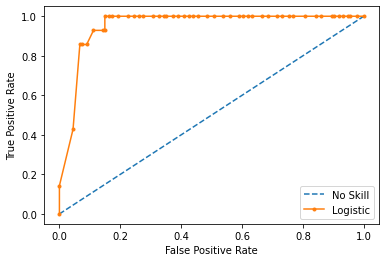

In [47]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = grid_log
model.fit(X_train_real, y_train_real)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.686 auc=0.650


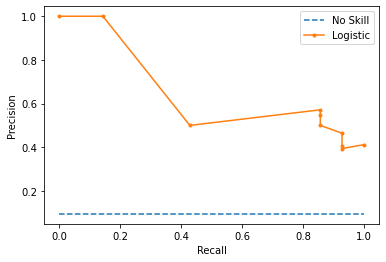

In [48]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# fit a model
model = grid_log
model.fit(X_train_real, y_train_real)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()